In [277]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import random
from datetime import timedelta

In [278]:
df=pd.read_csv("Assessment exercise dataset - orders.csv")

In [279]:
df['order_date'] = pd.to_datetime(df['order_timestamp'],infer_datetime_format=True)

In [280]:
df.drop("order_timestamp", axis=1, inplace=True)

In [281]:
df=df.sort_values(by='order_date',ascending=True)

In [282]:
df['month'] = pd.to_datetime(df['order_date']).dt.month

In [283]:
df['day']=df['order_date'].dt.day_name()

In [284]:
df['hour'] = pd.to_datetime(df['order_date']).dt.hour

In [285]:
df2 = df.groupby(['user_id','city'])['order_id'].agg('count').reset_index()
display(df2)

,user_id,city,order_id
0,44118921,Λαμία,1
1,108938802,Λέρος,3
2,110361993,Ρόδος,11
3,138437670,Άρτα,1
4,144777339,Αίγιο,14
...,...,...,...
124226,685557444369,Ξάνθη,1
124227,685561325799,Λάρισα,1
124228,685561843323,Βόλος,1
124229,685566242277,Δράμα,1


In [286]:
df2.rename(columns = {'order_id':'Num_of_orders'}, inplace = True)

In [287]:
df2=pd.merge(df2,df, left_on='user_id', right_on='user_id')

In [288]:
df2

,user_id,city_x,Num_of_orders,order_id,city_y,cuisine,paid_cash,amount,order_date,month,day,hour
0,44118921,Λαμία,1,7232420468092,Λαμία,Meat,True,33.3,2022-01-05 20:42:23+00:00,1,Wednesday,20
1,108938802,Λέρος,3,7218641876920,Λέρος,Meat,False,14.2,2022-01-03 19:51:13+00:00,1,Monday,19
2,108938802,Λέρος,3,7304554155028,Λέρος,Meat,False,12.7,2022-01-15 23:14:02+00:00,1,Saturday,23
3,108938802,Λέρος,3,7376863653584,Λέρος,Meat,False,17.3,2022-01-27 22:46:53+00:00,1,Thursday,22
4,110361993,Ρόδος,11,7207166752988,Ρόδος,Street food,True,15.2,2022-01-01 23:06:17+00:00,1,Saturday,23
...,...,...,...,...,...,...,...,...,...,...,...,...
552634,685557444369,Ξάνθη,1,7404041770344,Ξάνθη,Meat,True,6.8,2022-01-31 22:00:22+00:00,1,Monday,22
552635,685561325799,Λάρισα,1,7404267747268,Λάρισα,Meat,False,8.7,2022-01-31 22:25:38+00:00,1,Monday,22
552636,685561843323,Βόλος,1,7404277943468,Βόλος,Meat,True,7.2,2022-01-31 22:26:57+00:00,1,Monday,22
552637,685566242277,Δράμα,1,7404304861436,Δράμα,Breakfast,True,11.5,2022-01-31 22:30:24+00:00,1,Monday,22


In [289]:
df2.drop("city_y", axis=1, inplace=True)

In [290]:
df2.rename(columns = {'city_x':'city'}, inplace = True)

In [291]:
df2

,user_id,city,Num_of_orders,order_id,cuisine,paid_cash,amount,order_date,month,day,hour
0,44118921,Λαμία,1,7232420468092,Meat,True,33.3,2022-01-05 20:42:23+00:00,1,Wednesday,20
1,108938802,Λέρος,3,7218641876920,Meat,False,14.2,2022-01-03 19:51:13+00:00,1,Monday,19
2,108938802,Λέρος,3,7304554155028,Meat,False,12.7,2022-01-15 23:14:02+00:00,1,Saturday,23
3,108938802,Λέρος,3,7376863653584,Meat,False,17.3,2022-01-27 22:46:53+00:00,1,Thursday,22
4,110361993,Ρόδος,11,7207166752988,Street food,True,15.2,2022-01-01 23:06:17+00:00,1,Saturday,23
...,...,...,...,...,...,...,...,...,...,...,...
552634,685557444369,Ξάνθη,1,7404041770344,Meat,True,6.8,2022-01-31 22:00:22+00:00,1,Monday,22
552635,685561325799,Λάρισα,1,7404267747268,Meat,False,8.7,2022-01-31 22:25:38+00:00,1,Monday,22
552636,685561843323,Βόλος,1,7404277943468,Meat,True,7.2,2022-01-31 22:26:57+00:00,1,Monday,22
552637,685566242277,Δράμα,1,7404304861436,Breakfast,True,11.5,2022-01-31 22:30:24+00:00,1,Monday,22


In [292]:
from datetime import timedelta
snapshot_date = df2['order_date'].max() + timedelta(days=1)
print(snapshot_date)

2022-02-01 23:59:53+00:00


In [293]:
#groupby to get RFM data from each client
#amount gives us the sum of monetary value
#Num_of_orders counts orders (frequency)
#order date subtracks the last order from the snapshot date we explained earlier. (recency)
user_data= df2.groupby(['user_id']).agg({
        'order_date': lambda x: (snapshot_date - x.max()).days,
        'Num_of_orders': 'count',
        'amount': 'sum'})

In [294]:
user_data

,order_date,Num_of_orders,amount
user_id,,,
44118921,27,1,33.3
108938802,5,3,44.2
110361993,8,11,137.0
138437670,4,1,5.5
144777339,1,14,60.8
...,...,...,...
685557444369,1,1,6.8
685561325799,1,1,8.7
685561843323,1,1,7.2


In [295]:
#Rename columns for RFM
user_data.rename(columns={'order_date': 'Recency',
                         'Num_of_orders': 'Frequency',
                         'amount': 'MonetaryValue'}, inplace=True)

In [296]:
user_data.head()

,Recency,Frequency,MonetaryValue
user_id,,,
44118921,27,1,33.3
108938802,5,3,44.2
110361993,8,11,137.0
138437670,4,1,5.5
144777339,1,14,60.8


In [297]:
quartiles = user_data.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      Recency  Frequency  MonetaryValue
0.25      3.0        1.0          11.60
0.50      8.0        2.0          23.50
0.75     17.0        5.0          48.15 <class 'pandas.core.frame.DataFrame'>


In [298]:
quartiles=quartiles.to_dict()
quartiles

{'Recency': {0.25: 3.0, 0.5: 8.0, 0.75: 17.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'MonetaryValue': {0.25: 11.6, 0.5: 23.5, 0.75: 48.150000000000006}}

In [299]:
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1  

In [300]:
rfmSeg = user_data
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['MonetaryValue'].apply(FMClass, args=('MonetaryValue',quartiles,))

In [301]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [302]:
rfmSeg.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
44118921,27,1,33.3,4,4,2,442
108938802,5,3,44.2,2,2,2,222
110361993,8,11,137.0,2,1,1,211
138437670,4,1,5.5,2,4,4,244
144777339,1,14,60.8,1,1,1,111


In [303]:
rfmSeg.sort_values(by=['RFMClass', 'MonetaryValue'], ascending=[True, False])

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
user_id,,,,,,,
485537911656,1,38,1351.50,1,1,1,111
154559060124,1,135,945.40,1,1,1,111
653259935958,1,66,942.90,1,1,1,111
629495492640,1,24,863.05,1,1,1,111
119884693362,1,105,839.95,1,1,1,111
...,...,...,...,...,...,...,...
108495801456,20,1,0.50,4,4,4,444
217418689593,20,1,0.50,4,4,4,444
296635311987,30,1,0.50,4,4,4,444


In [304]:
rfmSeg.groupby('RFMClass').agg('MonetaryValue').mean()

RFMClass
111    112.641043
112     38.517867
113     19.326449
114      8.416667
121     66.425894
          ...    
434      8.710622
441     62.978788
442     30.008447
443     15.906172
444      6.904331
Name: MonetaryValue, Length: 64, dtype: float64

In [305]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121943 entries, 44118921 to 685567924230
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Recency        121943 non-null  int64  
 1   Frequency      121943 non-null  int64  
 2   MonetaryValue  121943 non-null  float64
 3   R_Quartile     121943 non-null  int64  
 4   F_Quartile     121943 non-null  int64  
 5   M_Quartile     121943 non-null  int64  
 6   RFMClass       121943 non-null  object 
 7   Total Score    121943 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 8.4+ MB
           Recency  Frequency  MonetaryValue  R_Quartile  F_Quartile  \
user_id                                                                
44118921        27          1           33.3           4           4   
108938802        5          3           44.2           2           2   
110361993        8         11          137.0           2           1   
13843

In [306]:

rfmSeg['R_rank'] = rfmSeg['Recency'].rank(ascending=False)
rfmSeg['F_rank'] = rfmSeg['Frequency'].rank(ascending=True)
rfmSeg['M_rank'] = rfmSeg['MonetaryValue'].rank(ascending=True)
 
# normalizing the rank of the customers
rfmSeg['R_rank_norm'] = (rfmSeg['R_rank']/rfmSeg['R_rank'].max())*100
rfmSeg['F_rank_norm'] = (rfmSeg['F_rank']/rfmSeg['F_rank'].max())*100
rfmSeg['M_rank_norm'] = (rfmSeg['M_rank']/rfmSeg['M_rank'].max())*100
 
rfmSeg.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfmSeg.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,R_rank_norm,F_rank_norm,M_rank_norm
user_id,,,,,,,,,,,
44118921,27,1,33.3,4,4,2,442,10,8.143617,16.743889,62.725208
108938802,5,3,44.2,2,2,2,222,6,64.434606,56.364449,72.245229
110361993,8,11,137.0,2,1,1,211,4,52.680482,90.755107,96.202324
138437670,4,1,5.5,2,4,4,244,10,70.326077,16.743889,7.161543
144777339,1,14,60.8,1,1,1,111,3,100.000000,94.000476,81.596320


In [307]:
rfmSeg['RFM_Score'] = 0.15*rfmSeg['R_rank_norm']+0.28 * \
    rfmSeg['F_rank_norm']+0.57*rfmSeg['M_rank_norm']
rfmSeg['RFM_Score'] *= 0.05
rfmSeg = rfmSeg.round(2)
rfmSeg 

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
user_id,,,,,,,,,,,,
44118921,27,1,33.3,4,4,2,442,10,8.14,16.74,62.73,2.08
108938802,5,3,44.2,2,2,2,222,6,64.43,56.36,72.25,3.33
110361993,8,11,137.0,2,1,1,211,4,52.68,90.76,96.20,4.41
138437670,4,1,5.5,2,4,4,244,10,70.33,16.74,7.16,0.97
144777339,1,14,60.8,1,1,1,111,3,100.00,94.00,81.60,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...
685557444369,1,1,6.8,1,4,4,144,9,100.00,16.74,11.31,1.31
685561325799,1,1,8.7,1,4,4,144,9,100.00,16.74,16.73,1.46
685561843323,1,1,7.2,1,4,4,144,9,100.00,16.74,12.55,1.34


In [308]:
rfmSeg['MonetaryValue'].mean()

38.50656011415156

In [309]:
rfmSeg['Frequency'].mean()

4.5319452531100595

In [310]:
rfmSeg["Customer_segment"] = np.where(rfmSeg['RFM_Score'] >
                                      4.5, "Champions!",
                                      (np.where(
                                        rfmSeg['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfmSeg['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfmSeg['RFM_Score'] > 1.6,
                            'Has Potential', 'Lost Customers'))))))
rfmSeg[['RFM_Score', 'Customer_segment']].head(20)

,RFM_Score,Customer_segment
user_id,,
44118921,2.08,Has Potential
108938802,3.33,Medium Value Customer
110361993,4.41,High value Customer
138437670,0.97,Lost Customers
144777339,4.39,High value Customer
145424244,4.73,Champions!
153963390,3.19,Medium Value Customer
155515962,0.55,Lost Customers
165219537,1.08,Lost Customers


In [311]:
rfm_level_agg = rfmSeg.groupby('Customer_segment').agg({
    'R_rank_norm': 'mean',
    'F_rank_norm': 'mean',
    'M_rank_norm': ['mean', 'count']
}).round(1)
 
rfm_level_agg.drop(columns=['R_rank_norm'], inplace=True)
rfm_level_agg

F_rank_norm M_rank_norm       
                             mean        mean  count
Customer_segment                                    
Champions!                   94.8        95.2   9416
Has Potential                44.5        46.0  36332
High value Customer          85.4        86.3  12087
Lost Customers               19.6        17.1  38346
Medium Value Customer        70.0        71.1  25762

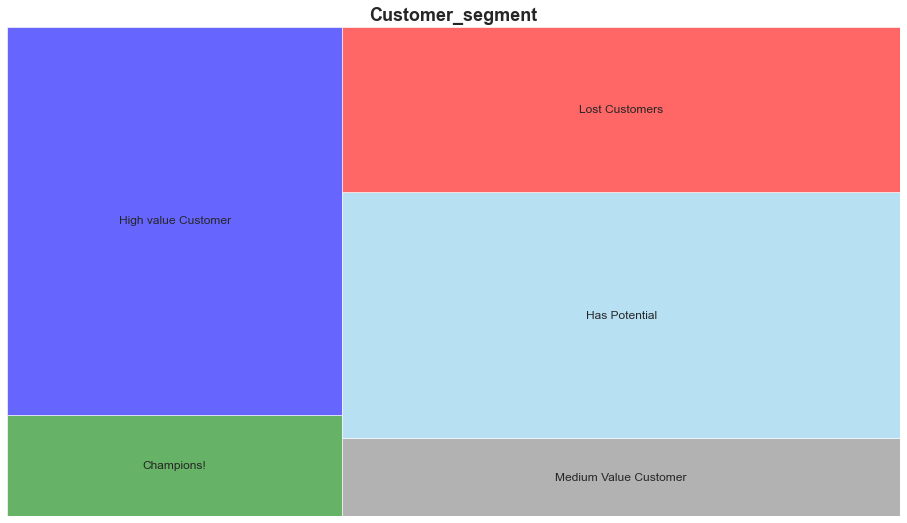

In [312]:
#Visulize class distribution

import squarify
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['F_rank_normMean','M_rank_normMean', 'Count']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions!',
                     'High value Customer', 
                     'Medium Value Customer', 
                     'Has Potential',
                     'Lost Customers'],
              color=["green","blue", "grey",'skyblue','red'], alpha=.6 )
plt.title("Customer_segment",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [313]:
rfm_table2 = rfmSeg.reset_index()

rfm_monetary_size = rfm_table2.groupby("Customer_segment").agg({"MonetaryValue": "mean",
                                                       "user_id": "nunique"})

rfm_monetary_size.rename(columns = {"MonetaryValue": "MeanMonetary", "user_id": "CustomerCount"}, inplace = True)
rfm_monetary_size = rfm_monetary_size.sort_values("MeanMonetary", ascending = False)

In [314]:
rfm_monetary_size

,MeanMonetary,CustomerCount
Customer_segment,,
Champions!,150.171162,9416
High value Customer,79.407793,12087
Medium Value Customer,45.457429,25762
Has Potential,22.241587,36332
Lost Customers,8.935382,38346


In [315]:
rfm_table2 = rfmSeg.reset_index()

rfm_freaq_size = rfm_table2.groupby("Customer_segment").agg({"Frequency": "mean",
                                                       "user_id": "nunique"})

rfm_freaq_size.rename(columns = {"Frequency": "MeanFrequency", "user_id": "CustomerCount"}, inplace = True)
rfm_freaq_size = rfm_freaq_size.sort_values("MeanFrequency", ascending = False)

In [316]:
rfm_freaq_size

,MeanFrequency,CustomerCount
Customer_segment,,
Champions!,19.167056,9416
High value Customer,9.237280,12087
Medium Value Customer,5.082525,25762
Has Potential,2.388721,36332
Lost Customers,1.115840,38346


In [317]:
rfm_freaq_size= rfm_freaq_size.rename_axis('Customer_segment').reset_index()

In [318]:
rfm_freaq_size

,Customer_segment,MeanFrequency,CustomerCount
0,Champions!,19.167056,9416
1,High value Customer,9.237280,12087
2,Medium Value Customer,5.082525,25762
3,Has Potential,2.388721,36332
4,Lost Customers,1.115840,38346


In [340]:
rfm_all=rfm_freaq_size[['Customer_segment','CustomerCount']]

In [341]:
rfm_all.to_csv(r'C:\Users\USER\mariam-kandilari-exercises\rfm_efood_all.csv', index=False)

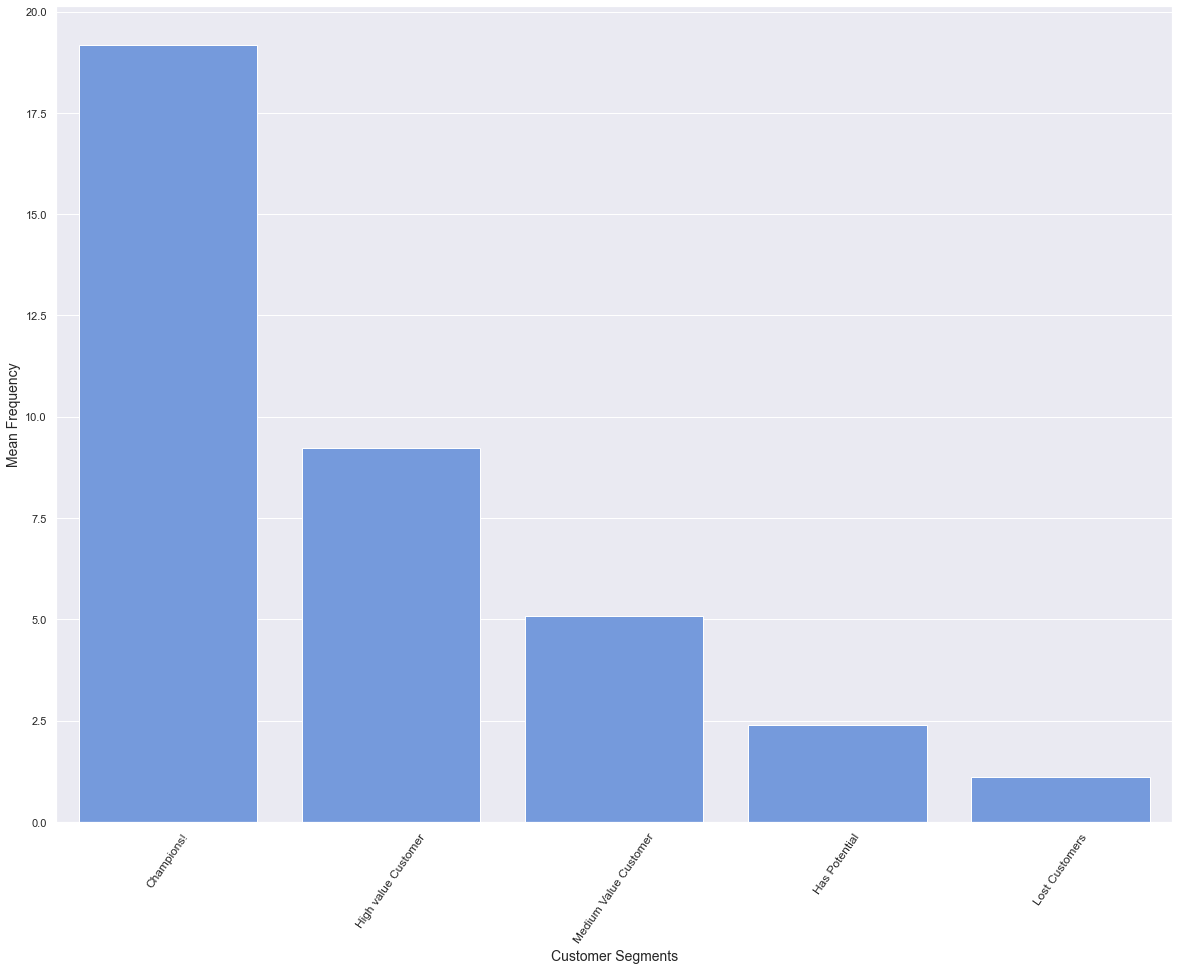

In [338]:
plt.figure(figsize=(20,15))
sns.barplot(x='Customer_segment',y='MeanFrequency',data=rfm_freaq_size,color='cornflowerblue')
plt.xticks(rotation=55,fontsize=12)
plt.xlabel('Customer Segments',fontsize=14)
plt.ylabel('Mean Frequency',fontsize=14)
plt.show()

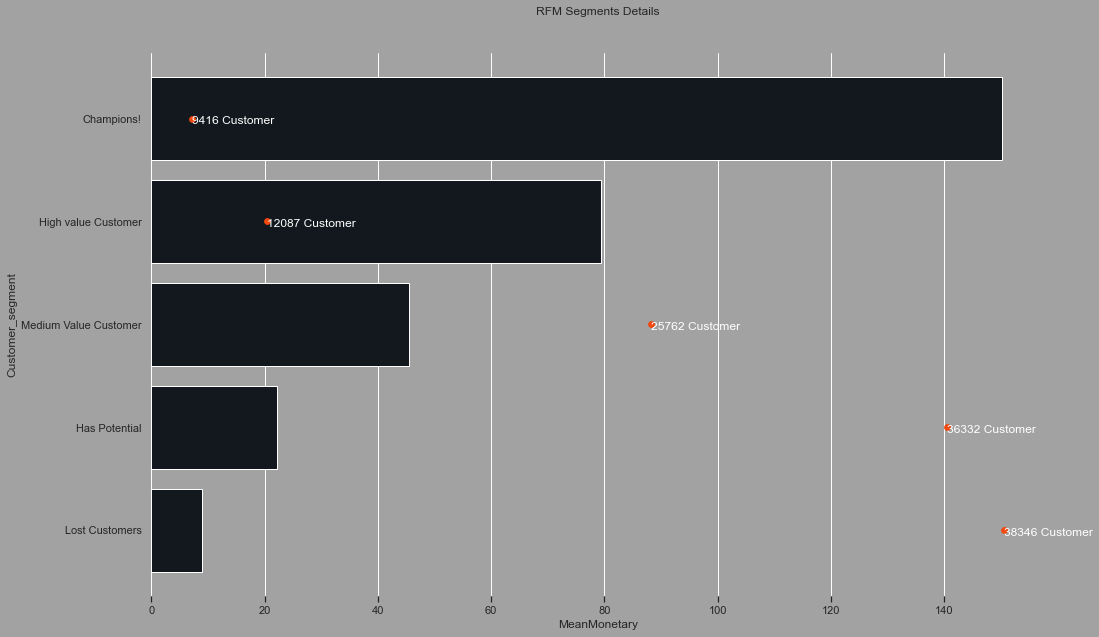

In [217]:
plt.rcParams["axes.facecolor"] = "#A2A2A2"
fig, ax = plt.subplots(figsize = (16, 10), facecolor = "#A2A2A2")

sns.barplot(x = rfm_monetary_size.MeanMonetary, y = rfm_monetary_size.index, ax = ax, color = "#101820")
ax2 = ax.twiny()
sns.lineplot(x = rfm_monetary_size.CustomerCount, y = rfm_monetary_size.index, ax = ax2, marker = "o", linewidth = 0,
             color = "#F1480F", markeredgecolor = "#F1480F")


ax2.axis("off")

for y, x in list(enumerate(rfm_monetary_size.CustomerCount)):
    ax2.text(x + 10, y + 0.05, str(x) + " Customer", color = "white", fontweight = "normal")

plt.title("RFM Segments Details")
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

In [218]:
monetary_per_segment = (rfm_table2.groupby("Customer_segment")["MonetaryValue"].sum() /\
                        rfm_table2.groupby("Customer_segment")["MonetaryValue"].sum().sum()).sort_values(ascending = False)

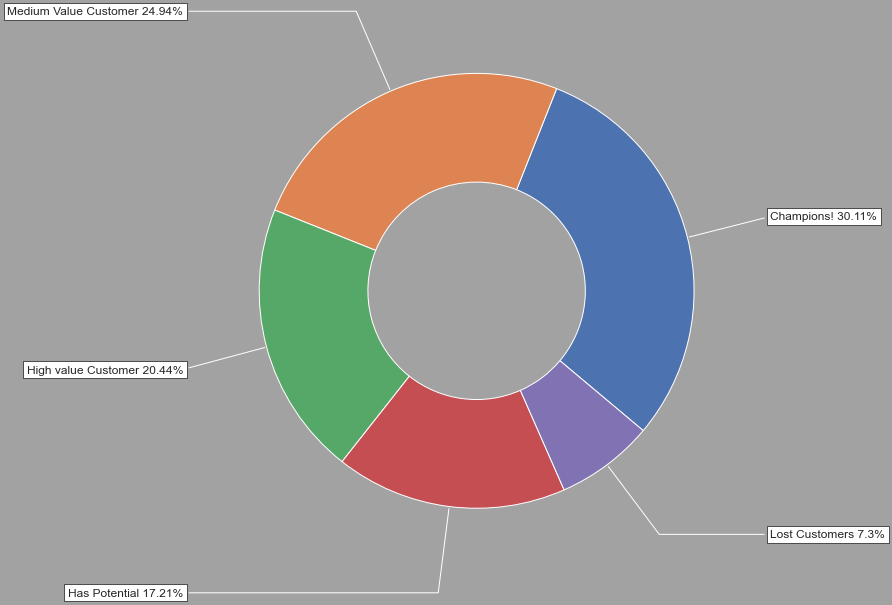

In [219]:
fig, ax = plt.subplots(figsize = (10, 10), facecolor = "#A2A2A2")

wedges, texts = ax.pie(monetary_per_segment.values, wedgeprops=dict(width=0.5), 
                       startangle=-40, normalize=False)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(monetary_per_segment.index[i] + " " + str(round(monetary_per_segment[i] * 100, 2)) + "%", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)
plt.show()

In [220]:
#get RFLM Level and the user id as the key to merge with data

df1 = pd.DataFrame(rfmSeg, columns=['Customer_segment']).reset_index()

In [221]:
data=df2.merge(df1, left_on='user_id', right_on='user_id')

In [222]:
data[['Breakfast/Gen_Foods']] = data[['cuisine']].replace(['Italian','Meat','Street food'], ['General Foods','General Foods','General Foods'])

Text(0, 0.5, 'orders')

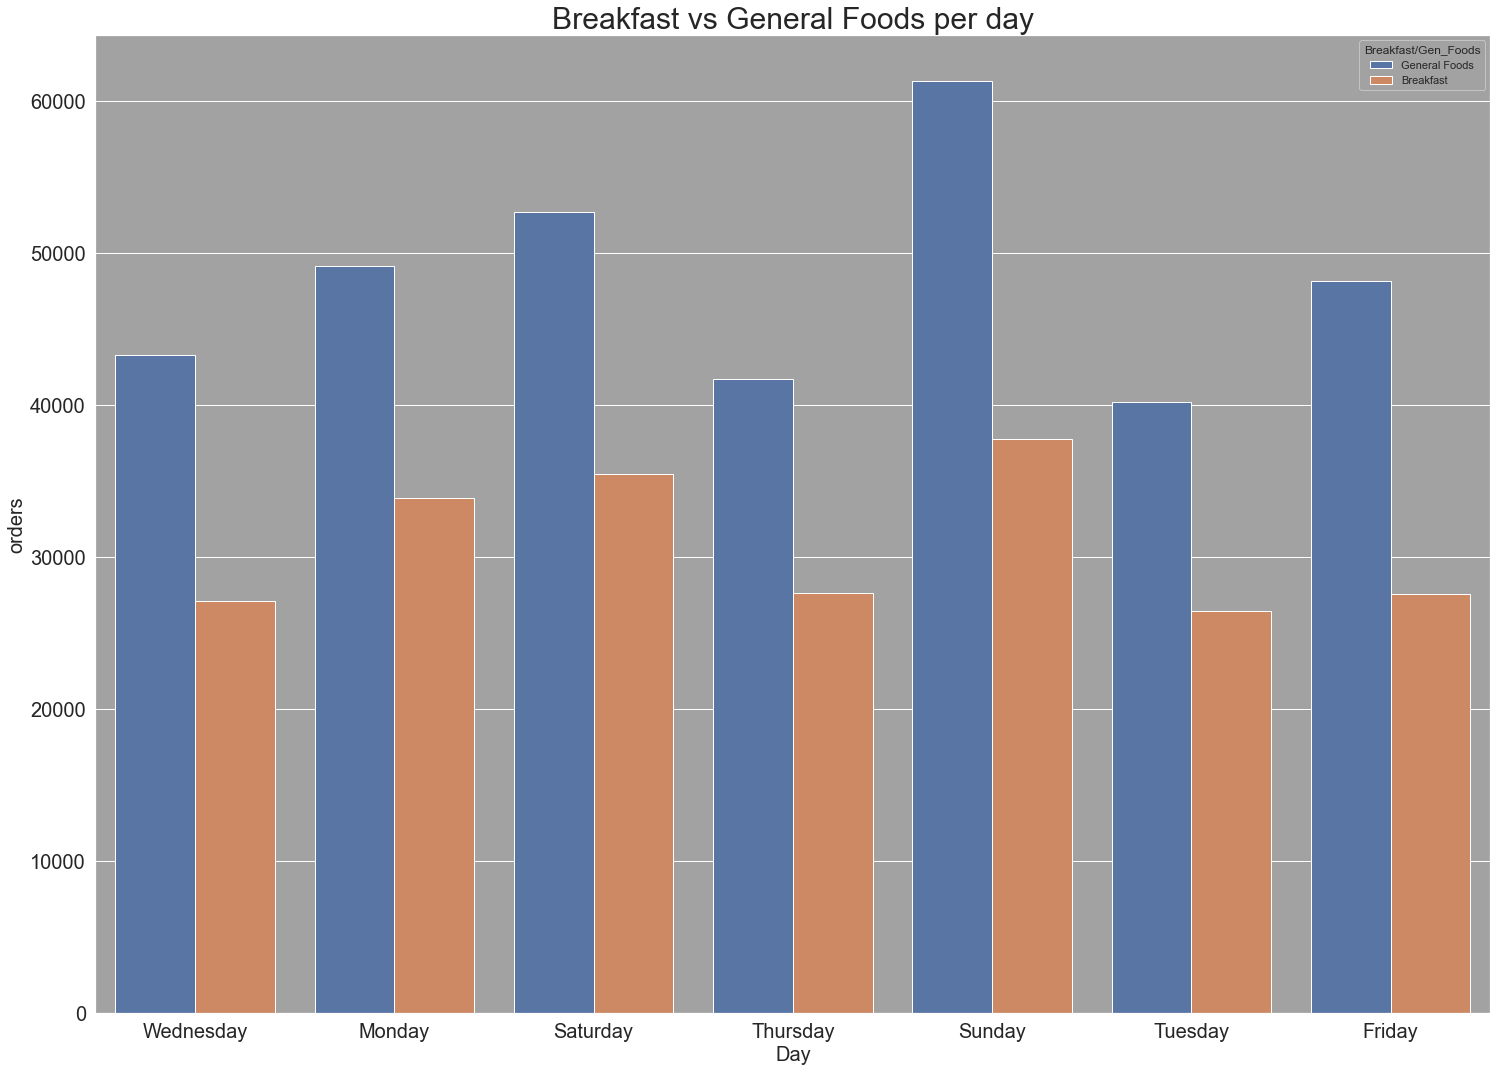

In [223]:
sns.countplot(x='day',hue='Breakfast/Gen_Foods',data=data)
sns.set(rc={'figure.figsize':(25,18)})
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title("Breakfast vs General Foods per day",fontsize=30)
plt.xlabel('Day', fontsize=20)
plt.ylabel('orders', fontsize=20)

In [224]:
#MBA

In [225]:
#Machine Learning for Market Basket Analysis

from mlxtend.frequent_patterns import apriori, association_rules

In [226]:
#code to groupbly cuisines and pivot cuisines as columns  

basket_champions=(data[data['Customer_segment'] =="Champions!"]
          .groupby(['user_id', 'cuisine'])['Num_of_orders']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_id'))

In [227]:
basket_champions

cuisine,Breakfast,Italian,Meat,Street food
user_id,,,,
145424244,12.0,60.0,36.0,36.0
187990593,20.0,30.0,30.0,20.0
542365152,112.0,0.0,32.0,112.0
788189052,45.0,0.0,18.0,18.0
1085765352,22.0,22.0,55.0,22.0
...,...,...,...,...
683215518888,238.0,34.0,0.0,17.0
683406744006,36.0,36.0,9.0,0.0
683821410111,120.0,15.0,90.0,0.0


In [228]:
#association rules need categorical elements. Turning numeric data to categorical "True" or "False"

def hot_encode(x):
    if(x<= 0):
        return False
    if(x>= 1):
        return True

In [229]:
basket_encoded = basket_champions.applymap(hot_encode)

In [230]:
#Create frequent item list. Min support = 0.05 proposed to get more combinations

frq_items = apriori(basket_encoded, min_support = 0.05, use_colnames = True)

In [231]:
#the higher the lift the more likely these items are bought in sequence

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)

In [232]:
rules = rules.sort_values(['lift', 'confidence'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Street food),"(Breakfast, Italian)",0.514125,0.654418,0.350573,0.681884,1.041970,0.014121,1.086339
11,"(Breakfast, Italian)",(Street food),0.654418,0.514125,0.350573,0.535703,1.041970,0.014121,1.046474
22,"(Street food, Meat)","(Breakfast, Italian)",0.465697,0.654418,0.317545,0.681870,1.041949,0.012784,1.086292
21,"(Breakfast, Italian)","(Street food, Meat)",0.654418,0.465697,0.317545,0.485232,1.041949,0.012784,1.037950
14,"(Street food, Meat)",(Italian),0.465697,0.765506,0.370008,0.794527,1.037911,0.013515,1.141241
17,(Italian),"(Street food, Meat)",0.765506,0.465697,0.370008,0.483352,1.037911,0.013515,1.034172
4,(Street food),(Italian),0.514125,0.765506,0.407816,0.793225,1.036210,0.014251,1.134054
5,(Italian),(Street food),0.765506,0.514125,0.407816,0.532741,1.036210,0.014251,1.039842
18,"(Breakfast, Street food, Meat)",(Italian),0.401338,0.765506,0.317545,0.791215,1.033584,0.010318,1.123136
25,(Italian),"(Breakfast, Street food, Meat)",0.765506,0.401338,0.317545,0.414817,1.033584,0.010318,1.023033


In [233]:
#same process for High value

In [234]:
basket_High_value=(data[data['Customer_segment'] =="High value Customer"]
          .groupby(['user_id', 'cuisine'])['Num_of_orders']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_id'))

In [235]:
basket_High_value

cuisine,Breakfast,Italian,Meat,Street food
user_id,,,,
110361993,11.0,44.0,33.0,33.0
144777339,196.0,0.0,0.0,0.0
186049878,4.0,12.0,0.0,0.0
372229137,65.0,52.0,52.0,0.0
433038207,0.0,20.0,5.0,0.0
...,...,...,...,...
683085232221,18.0,0.0,18.0,0.0
683243853327,0.0,7.0,42.0,0.0
683245923423,12.0,0.0,24.0,0.0


In [236]:
basket_encoded_High_value = basket_High_value.applymap(hot_encode)

In [237]:
basket_encoded_High_value

cuisine,Breakfast,Italian,Meat,Street food
user_id,,,,
110361993,True,True,True,True
144777339,True,False,False,False
186049878,True,True,False,False
372229137,True,True,True,False
433038207,False,True,True,False
...,...,...,...,...
683085232221,True,False,True,False
683243853327,False,True,True,False
683245923423,True,False,True,False


In [238]:
frq_items_High_value = apriori(basket_encoded_High_value, min_support = 0.05, use_colnames = True)

In [239]:
rules_High_value = association_rules(frq_items_High_value, metric ="lift", min_threshold = 1)

In [240]:
rules_High_value = rules_High_value.sort_values(['lift', 'confidence'], ascending =[False, False])


In [241]:
rules_High_value

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Street food),(Italian),0.41102,0.66435,0.273848,0.666264,1.002881,0.000787,1.005735
1,(Italian),(Street food),0.66435,0.41102,0.273848,0.412204,1.002881,0.000787,1.002015


In [242]:
#same process for Medium Value

In [243]:
basket_Medium_Value=(data[data['Customer_segment'] =="Medium Value Customer"]
          .groupby(['user_id', 'cuisine'])['Num_of_orders']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_id'))

In [244]:
basket_encoded_Medium_Value = basket_Medium_Value.applymap(hot_encode)

In [245]:
frq_items_Medium_Value = apriori(basket_encoded_Medium_Value, min_support = 0.05, use_colnames = True)

In [246]:
rules_Medium_Value = association_rules(frq_items_Medium_Value, metric ="lift", min_threshold = 0.9)

In [247]:
rules_Medium_Value = rules_Medium_Value.sort_values(['lift', 'confidence'], ascending =[False, False])

In [248]:
rules_Medium_Value

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Italian),(Meat),0.53641,0.74443,0.377766,0.704248,0.946023,-0.021554,0.864136
2,(Meat),(Italian),0.74443,0.53641,0.377766,0.507456,0.946023,-0.021554,0.941216
0,(Breakfast),(Meat),0.54526,0.74443,0.379280,0.695593,0.934398,-0.026629,0.839568
1,(Meat),(Breakfast),0.74443,0.54526,0.379280,0.509490,0.934398,-0.026629,0.927075
4,(Street food),(Italian),0.31430,0.53641,0.156859,0.499074,0.930396,-0.011735,0.925465
5,(Italian),(Street food),0.53641,0.31430,0.156859,0.292423,0.930396,-0.011735,0.969082


In [249]:
#same process for Has Potential

In [250]:
basket_Has_Potential=(data[data['Customer_segment'] =="Has Potential"]
          .groupby(['user_id', 'cuisine'])['Num_of_orders']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_id'))

In [251]:
basket_encoded_Has_Potential = basket_Has_Potential.applymap(hot_encode)

In [252]:
frq_items_Has_Potential = apriori(basket_encoded_Has_Potential, min_support = 0.05, use_colnames = True)

In [253]:
rules_Has_Potential = association_rules(frq_items_Has_Potential, metric ="lift", min_threshold = 0.7)

In [254]:
rules_Has_Potential = rules_Has_Potential.sort_values(['lift', 'confidence'], ascending =[False, False])

In [255]:
rules_Has_Potential

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Breakfast),(Meat),0.369619,0.566113,0.167208,0.452379,0.799098,-0.042038,0.792314
1,(Meat),(Breakfast),0.566113,0.369619,0.167208,0.295362,0.799098,-0.042038,0.894616
